# 다음 분기에는 어떤 게임을 제작해야 할까????

### 데이터 전처리

- 데이터 불러오기
- 데이터 결측치 확인
- 연도 칼럼의 데이터타입 변경
- 출고량의 데이터 단위 통일

In [1]:
import pandas as pd

df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')

# 첫번째 열 삭제(Unnamed: 0)
df = df.drop(df.columns[0], axis=1)

df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [2]:
# 결측치 확인하기
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [3]:
df = df.dropna()

# 인덱스 정리
df = df.reset_index(drop=True)
df.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [4]:
# 연도 칼럼 데이터타입 변경
df['Year'] = df['Year'].astype('int64')
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [5]:
df['Year'].dtypes

dtype('int64')

In [6]:
# 출고량 데이터 단위 통일
def s_unit(x) :
    if 'K' in x :
        return(float(x.replace('K', '')) *0.001)
    else :
        return(float(x.replace('M', '')))

df['NA_Sales'] = df['NA_Sales'].apply(s_unit)
df['EU_Sales'] = df['EU_Sales'].apply(s_unit)
df['JP_Sales'] = df['JP_Sales'].apply(s_unit)
df['Other_Sales'] = df['Other_Sales'].apply(s_unit)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


### 지역에 따라서 선호하는 게임 장르가 다를까?

chi square test를 이용하여 지역별 선호하는 장르에 차이가 있는지 검정

- 귀무가설 : 지역별 선호하는 장르에는 다르지 않다(차이가 없다)

- 대립가설 : 지역별 선호하는 장르에는 다르다(차이가 있다)


In [7]:
local = df.groupby('Genre').sum()
local = local.drop(['Year'],axis=1).T
local

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
NA_Sales,858.75,101.79,220.35,394.73,445.38,121.58,354.70,318.76,574.48,181.43,667.26,67.83
EU_Sales,513.64,63.66,99.90,208.15,200.63,50.47,235.02,183.09,310.23,112.99,370.97,44.82
JP_Sales,156.60,51.87,87.14,104.18,130.53,56.24,56.32,342.93,38.18,63.54,134.76,49.10
Other_Sales,183.99,16.70,36.15,72.64,51.45,12.44,76.51,56.73,101.86,31.32,132.35,11.23


In [8]:
from scipy.stats import chi2_contingency

print(chi2_contingency(local))

(684.336340516928, 9.635373883688875e-123, 33, array([[842.66837143, 115.12174823, 218.19118114, 383.55878598,
        407.31414544, 118.42260683, 355.44491575, 443.48093003,
        504.10653576, 191.49899218, 642.13752173,  85.09426549],
       [468.29974503,  63.97710792, 121.25633043, 213.15678595,
        226.35845479,  65.81150838, 197.53294304, 246.45757869,
        280.14930922, 106.42256462, 356.85786709,  47.28980484],
       [248.7462714 ,  33.98265154,  64.40759449, 113.22226051,
        120.23457673,  34.95702805, 104.92336069, 130.91060674,
        148.80660697,  56.52835908, 189.55180907,  25.11887472],
       [153.26561214,  20.93849231,  39.68489393,  69.76216756,
         74.08282303,  21.53885674,  64.64878052,  80.66088454,
         91.68754804,  34.83008412, 116.79280211,  15.47705495]]))


chi square test를 진행해본 결과, pvalue값이 **9.635373883688875e-123**로 0과 한없이 가까운 값이다.

0.05보다 작으므로 귀무가설을 기각하여 대립가설을 채택한다.

***따라서 지역에 따라서 선호하는 게임 장르는 다르다.***

🎮 chi squared test가 와닿지 않기에 좀 더 시각적으로 보이기 위해 lineplot 제작

In [9]:
local01 = local.copy().T.reset_index()
local01

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,858.75,513.64,156.60,183.99
1,Adventure,101.79,63.66,51.87,16.70
2,Fighting,220.35,99.90,87.14,36.15
3,Misc,394.73,208.15,104.18,72.64
4,Platform,445.38,200.63,130.53,51.45
5,Puzzle,121.58,50.47,56.24,12.44
6,Racing,354.70,235.02,56.32,76.51
7,Role-Playing,318.76,183.09,342.93,56.73
8,Shooter,574.48,310.23,38.18,101.86
9,Simulation,181.43,112.99,63.54,31.32


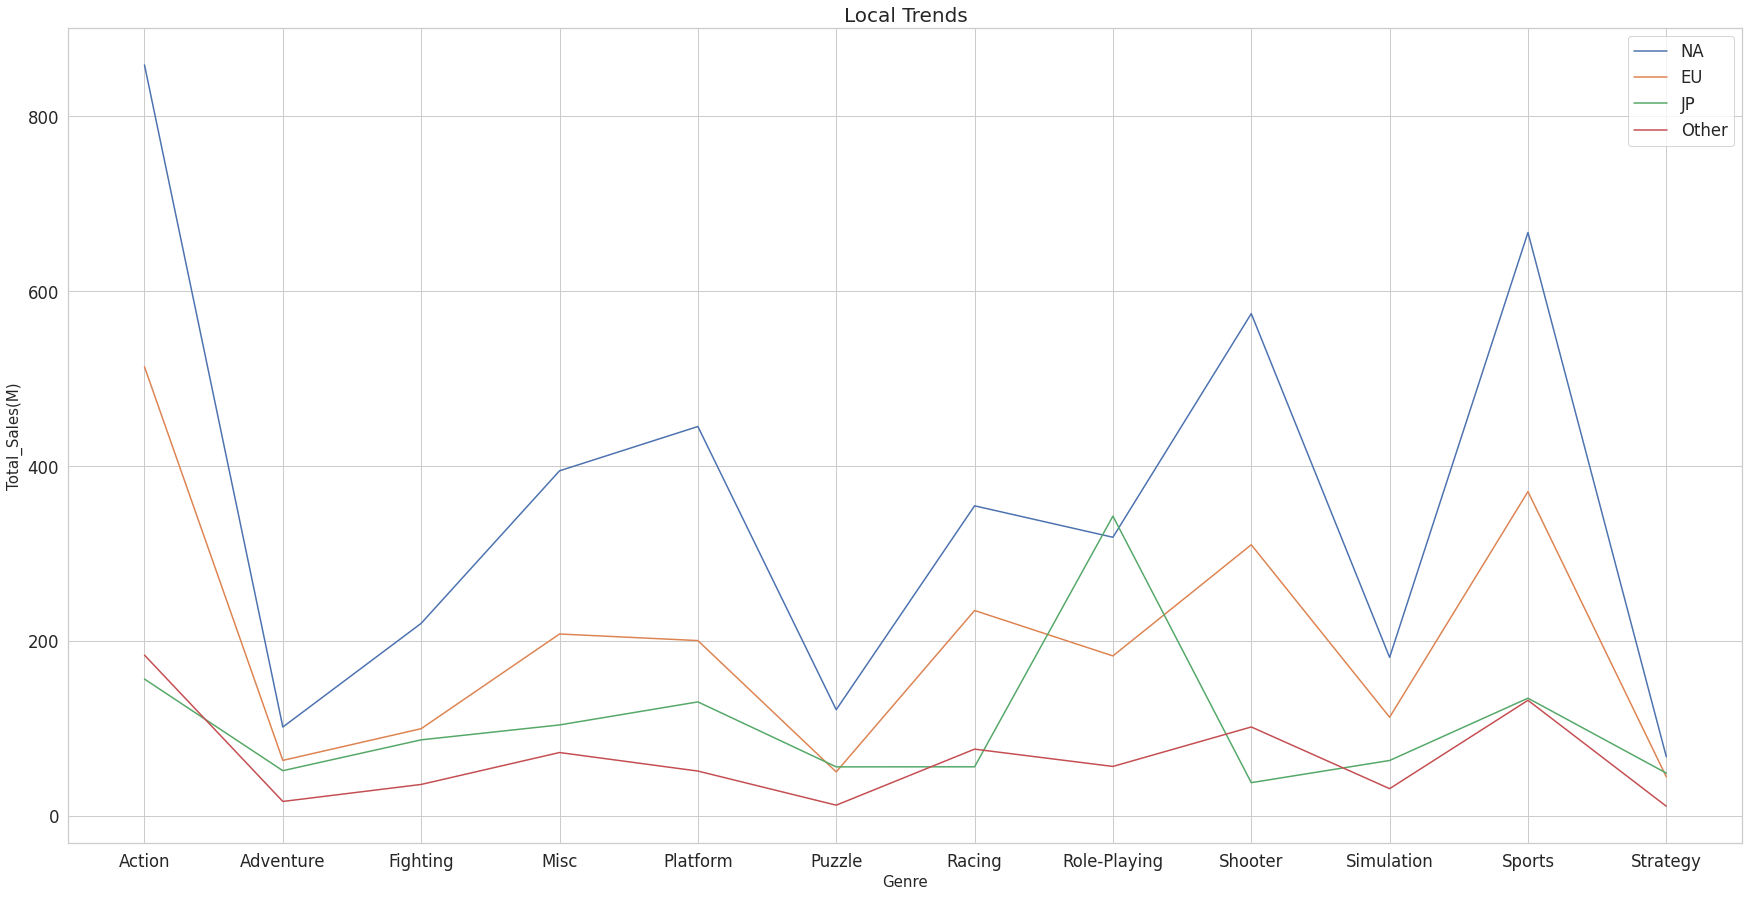

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30,15))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
sns.lineplot(data=local01,x='Genre',y='NA_Sales', label='NA')
sns.lineplot(data=local01,x='Genre',y='EU_Sales', label='EU')
sns.lineplot(data=local01,x='Genre',y='JP_Sales', label='JP')
sns.lineplot(data=local01,x='Genre',y='Other_Sales', label='Other')

plt.legend()
plt.xlabel("Genre",size=15)
plt.ylabel("Total_Sales(M)",size=15)
plt.title("Local Trends",size=20)
plt.show()

### 연도별 게임 트렌드가 있을까?



In [11]:
year = df.copy()
year['Total_Sales'] = ( year['NA_Sales'] + year['EU_Sales'] + year['JP_Sales'] + year['Other_Sales'] )
year = year.groupby(by=['Year','Genre'])['Total_Sales'].sum().reset_index()
year

,Year,Genre,Total_Sales
0,0,Platform,0.09
1,0,Shooter,0.02
2,0,Strategy,0.20
3,1,Racing,0.70
4,1,Sports,1.57
...,...,...,...
462,2016,Sports,14.46
463,2016,Strategy,0.52
464,2017,Action,0.01
465,2017,Role-Playing,0.04


In [12]:
a = year[year['Year'] < 100].index
year = year.drop(a, axis='index').reset_index(drop=True)
year

,Year,Genre,Total_Sales
0,1980,Action,0.34
1,1980,Fighting,0.77
2,1980,Misc,2.70
3,1980,Shooter,7.07
4,1981,Action,14.79
...,...,...,...
383,2016,Sports,14.46
384,2016,Strategy,0.52
385,2017,Action,0.01
386,2017,Role-Playing,0.04


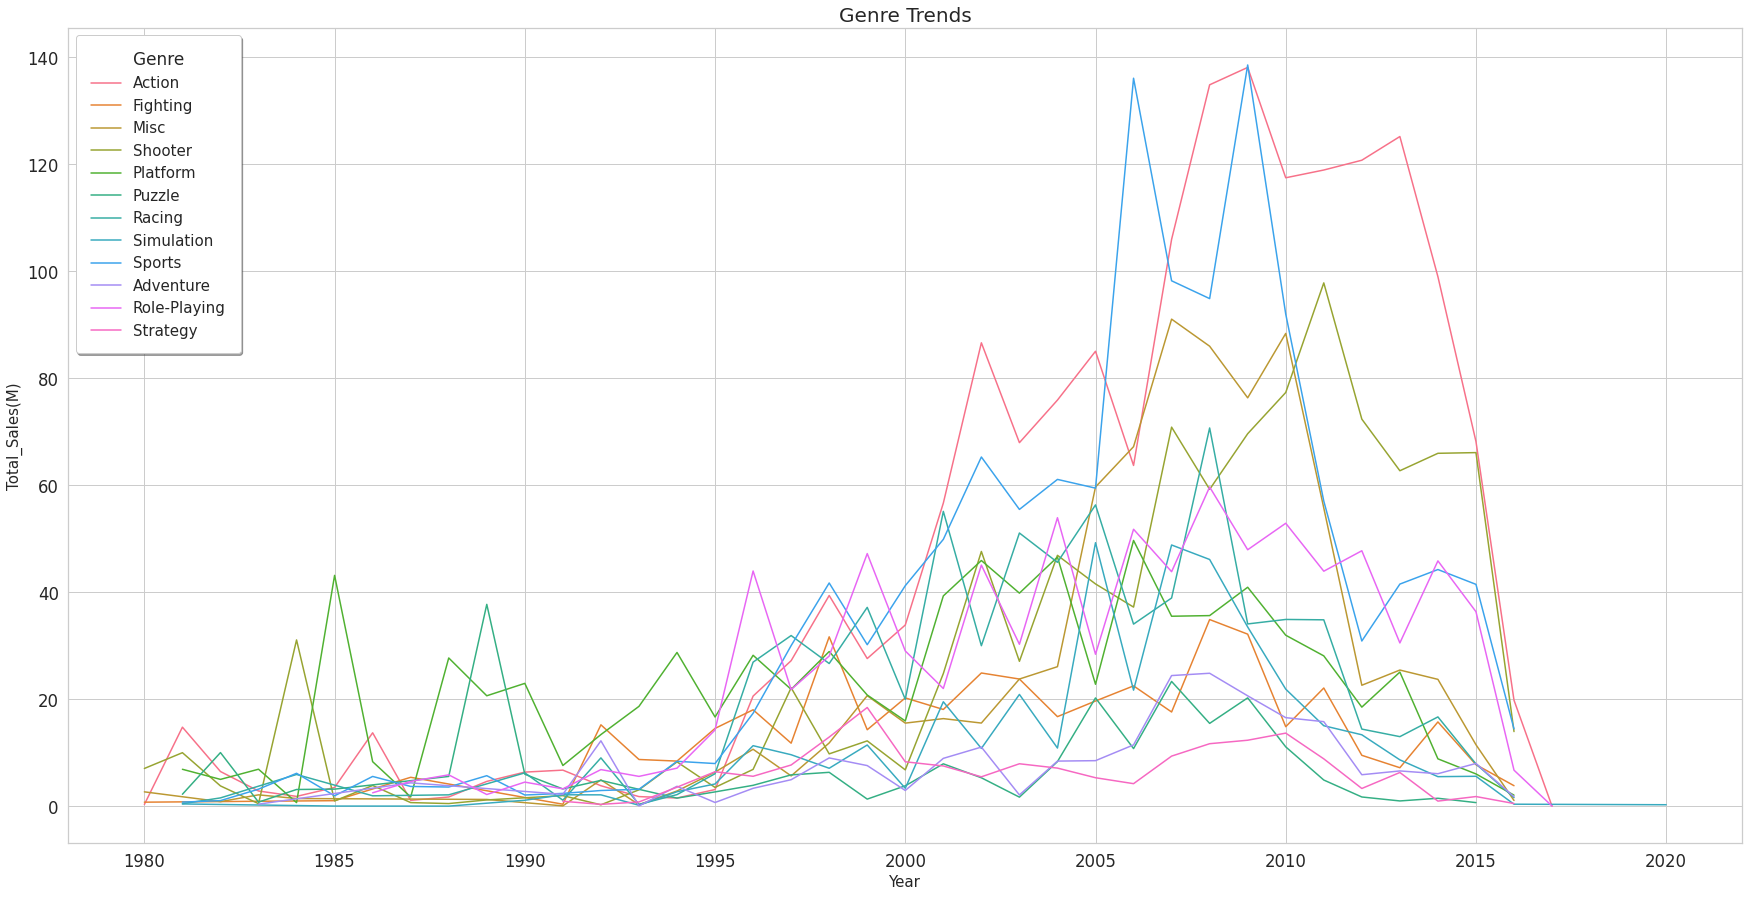

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30,15))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
sns.lineplot(data = year,x='Year',y='Total_Sales',hue='Genre')
plt.legend(borderpad=1,fontsize=15,frameon=True,shadow=True,
           title='Genre',title_fontsize=17,loc=2)
plt.xlabel("Year",size=15)
plt.ylabel("Total_Sales(M)",size=15)
plt.title("Genre Trends",size=20)
plt.show()

2000년대가 1980, 1990년대 보다 게임 출고량이 우세함

특히 **액션, 스포츠, 슈팅** 순으로 인기가 있음

In [14]:
year_max = year.loc[year.groupby(['Year'])['Total_Sales'].idxmax()]
year_max = year_max.reset_index(drop=True)
year_max.head()

,Year,Genre,Total_Sales
0,1980,Shooter,7.07
1,1981,Action,14.79
2,1982,Puzzle,10.04
3,1983,Platform,6.93
4,1984,Shooter,31.10


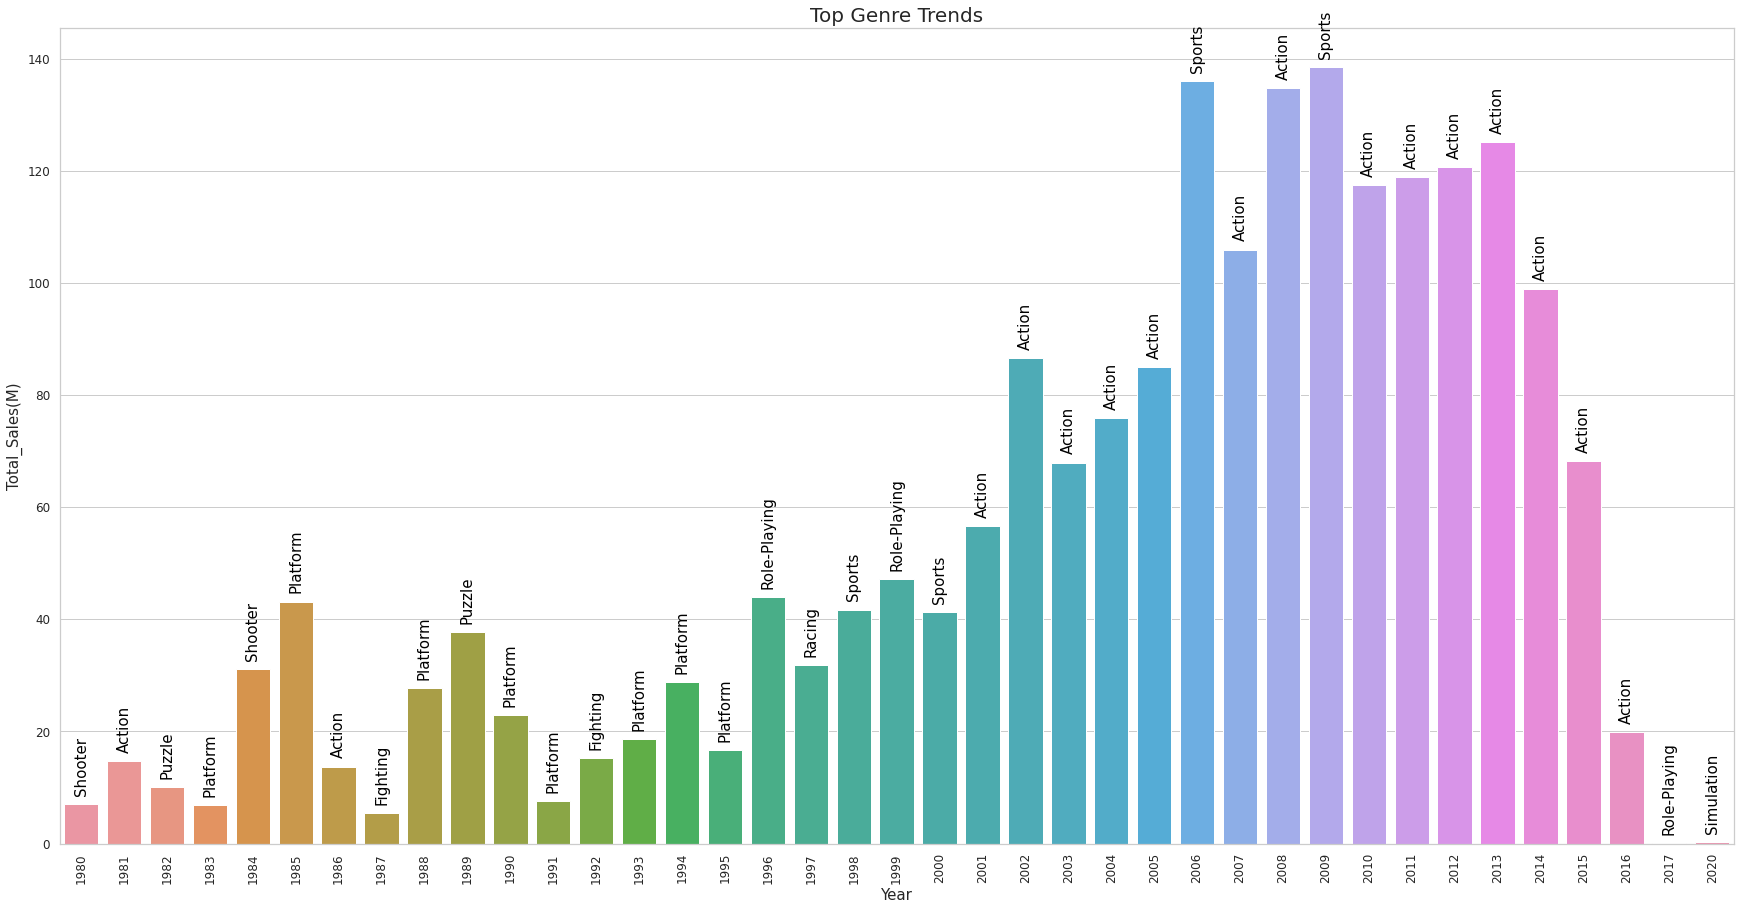

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30,15))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
ax = sns.barplot(data=year_max, x='Year', y='Total_Sales')

# 막대기에 텍스트 추가하기(장르)
idx = 0
for i in range(len(year_max['Year'])):
    ax.text(idx, year_max['Total_Sales'][i]+2, str(year_max['Genre'][i]), 
             fontsize=15, ha='center', rotation=90, color = 'black')
    idx += 1

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Year",size=15)
plt.ylabel("Total_Sales(M)",size=15)
plt.title("Top Genre Trends",size=20)
plt.show()

해당 연도에 출고량이 가장 높은 장르를 바그래프 형태로 표현하였음.

2000년대에 액션과 스포츠가 압도적으로 인기가 있다는 것을 확인할 수 있었음

### 높은 출고량의 게임 분석 및 시각화 프로세스



In [16]:
high = df.groupby('Name').sum()
high['Total_Sales'] = ( high['NA_Sales'] + high['EU_Sales'] + high['JP_Sales'] + high['Other_Sales'] )
high = high[['Total_Sales']]
high = high.sort_values('Total_Sales',ascending = 0).reset_index()
high.head(7)

,Name,Total_Sales
0,Wii Sports,82.74
1,Grand Theft Auto V,55.92
2,Super Mario Bros.,45.31
3,Tetris,35.84
4,Mario Kart Wii,35.83
5,Wii Sports Resort,33.00
6,Pokemon Red/Pokemon Blue,31.38


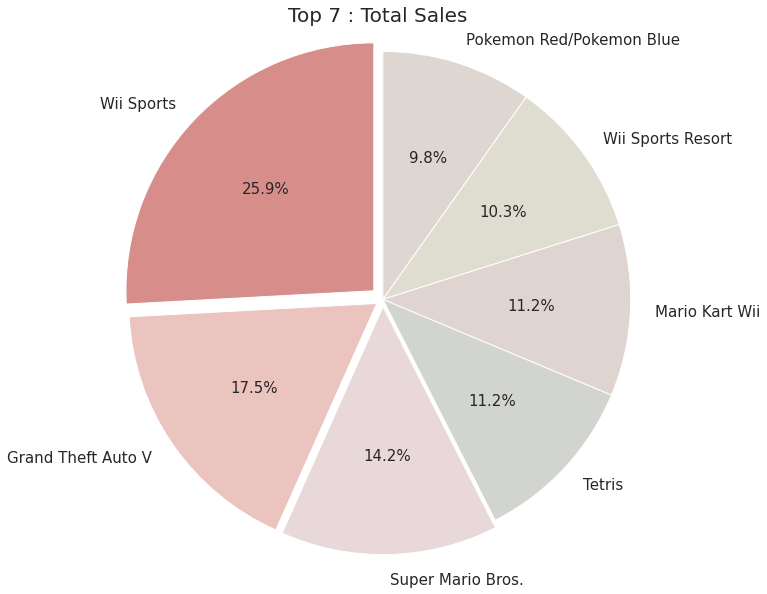

In [17]:
import matplotlib.pyplot as plt

high01 = high.head(7)

exp = (0.05,0.03,0.03,0,0,0,0)
color = ['#D78E8B', '#EBC3BF', '#E8D8D9','#D2D4D0','#DFD4D0','#DEDDD0','#DED6D0']
fig = plt.figure(figsize=(10, 10))
plt.pie(high01['Total_Sales'],
        labels=high01['Name'],
        startangle = 90,
        textprops = {'fontsize': 15},
        autopct = '%1.1f%%',
        explode = exp,
        colors = color )

plt.axis('equal')
plt.title("Top 7 : Total Sales", size=20)
plt.show()

In [18]:
# 출고량 Top 3의 장르

print('[       1위       ]')
print(df[df['Name'] == 'Wii Sports']['Genre'])
print('\n','-----------------------', '\n')
print('[       2위       ]')
print(df[df['Name'] == 'Grand Theft Auto V']['Genre'])
print('\n','-----------------------', '\n')
print('[       3위       ]')
print(df[df['Name'] == 'Super Mario Bros.']['Genre'])

[       1위       ]
2855    Sports
Name: Genre, dtype: object

 ----------------------- 

[       2위       ]
1973     Action
3414     Action
10619    Action
10695    Action
16219    Action
Name: Genre, dtype: object

 ----------------------- 

[       3위       ]
4113     Platform
12778    Platform
Name: Genre, dtype: object


역대 기간동안 출고량이 높았던 게임의 장르는 스포츠, 액션, 플랫폼임

### 우리가 제작해야 할 게임은?

- `지역`별로 따르면 북미와 유럽은 **액션**, 일본 지역은 **롤플레잉** 게임 인기
- `연도`별로 따르면 2000년 대에는 **액션, 스포츠**가 인기
- `출고량`별로 따르면 높은 출고량을 보인 게임의 장르는 **스포츠, 액션, 플랫폼**임

**🎮 즉, 현재까지 인기가 지속되고 있는 액션 게임을 제작해야 한다.**